![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
import tensorflow
tensorflow.__version__

'2.3.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change current working directory to project folder (2 mark)

In [3]:
#### Add your code here ####
import pandas as pd
import numpy as np
import cv2
import os
import tensorflow as tf
os.chdir("/content/drive/My Drive/AIML/Colab_Notebook/Advanced Computer Vision/Project")
os.getcwd()

'/content/drive/My Drive/AIML/Colab_Notebook/Advanced Computer Vision/Project'

### Extract the zip file (4 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [4]:
#### Add your code here ####
data_set = "/content/drive/My Drive/AIML/Colab_Notebook/Advanced Computer Vision/Project/Aligned Face Dataset.zip"
from zipfile import ZipFile
with ZipFile(data_set, 'r') as z:
  z.extractall()

In [5]:
!ls

'Aligned Face Dataset.zip'		  pins	 Questions_Notebook_ACV.ipynb
'Description-ACV- Face Recognition.pdf'   PINS	 vgg_face_weights.h5


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [6]:

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [7]:
metadata

array([PINS/pins_Aaron Paul/Aaron Paul0_262.jpg,
       PINS/pins_Aaron Paul/Aaron Paul101_247.jpg,
       PINS/pins_Aaron Paul/Aaron Paul101_248.jpg, ...,
       PINS/pins_zendaya/zendaya97.jpg, PINS/pins_zendaya/zendaya98.jpg,
       PINS/pins_zendaya/zendaya99.jpg], dtype=object)

In [8]:
metadata.shape

(10770,)

### Define function to load image
- Define a function to load image from the metadata

In [9]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (4 marks)
- Load one image using the function "load_image"

In [13]:
#### Add your code here ####
image = load_image(metadata[10].image_path())

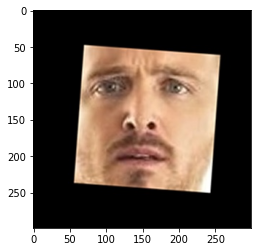

In [14]:
import matplotlib.pyplot as plt
plt.imshow(image)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (4 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [16]:
#### Add your code here ####
#### Add your code here ####
model = vgg_face()
model.load_weights("/content/drive/My Drive/AIML/Colab_Notebook/Advanced Computer Vision/Project/vgg_face_weights.h5")

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Get vgg_face_descriptor

In [18]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [19]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (10 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [20]:
embeddings = np.zeros((metadata.shape[0], 2622))
print(type(embeddings))
print(embeddings.shape)
for i, m in enumerate(metadata):
  print(i,m)
  break

<class 'numpy.ndarray'>
(10770, 2622)
0 PINS/pins_Aaron Paul/Aaron Paul0_262.jpg


In [21]:
# for i, m in enumerate(metadata):
#   #### Add your code here ####
#   img_path = metadata[i].image_path()
#   img = load_image(img_path)

#   img = (img / 255.).astype(np.float32)
#   img = cv2.resize(img, dsize=(224,224))

#   emb_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
#   embeddings[i] = emb_vector

In [22]:
def preprocess_image(img_path):
  img = load_image(img_path)
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))
  img = np.expand_dims(img, axis=0)
  img = tf.keras.applications.imagenet_utils.preprocess_input(img)
  return img

In [23]:
embeddings = []
for i, m in enumerate(metadata):
  embeddings.append(vgg_face_descriptor.predict(preprocess_image(metadata[i].image_path())))

In [24]:
len(embeddings)

10770

In [25]:
embeddings[0]

array([[1.4208317 , 1.4941736 , 0.5952625 , ..., 1.6846247 , 0.85117453,
        0.9792639 ]], dtype=float32)

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [26]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

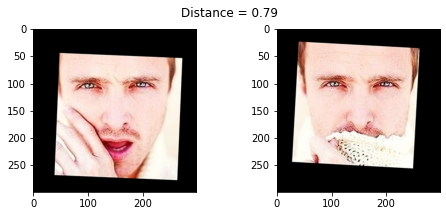

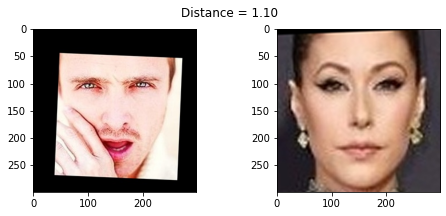

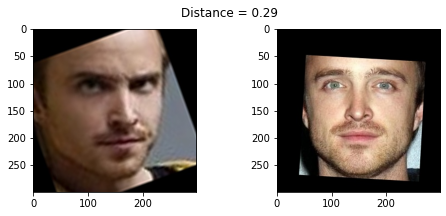

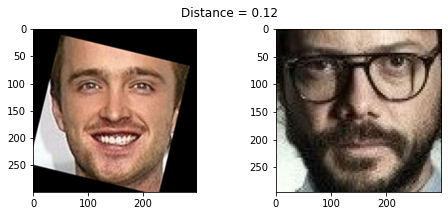

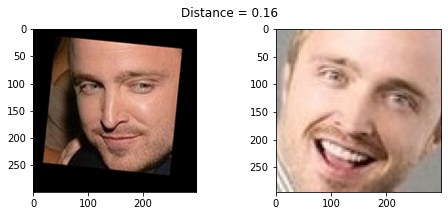

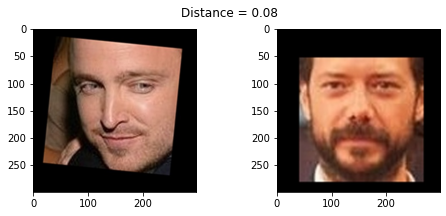

In [27]:


def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(20, 100)
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (10 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [28]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

In [29]:
type(embeddings)
embeddings = np.array(embeddings)

In [30]:
embeddings.shape

(10770, 1, 2622)

In [31]:
# print(train_idx[1])
# print(test_idx[2])
# print(train_idx.shape, test_idx.shape)

In [32]:
# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]

In [33]:
# trn = 0
# tst = 0
# for i in range(len(train_idx)):
#   if(train_idx[i]):    
#     X_train[trn] = embeddings[i]
#     trn += 1
#   elif(test_idx[i]):
#     X_test[tst] = embeddings[i]
#     tst +=1

In [34]:
print(train_idx[2])
print(test_idx[2])
print(y_train[2], y_test[2])

True
False
pins_Aaron Paul pins_Aaron Paul


In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9573, 1, 2622) (1197, 1, 2622) (9573,) (1197,)


### Encode the Labels (6 marks)
- Encode the targets
- Use LabelEncoder

In [36]:
from sklearn.preprocessing import LabelEncoder
lbec = LabelEncoder()
y_train_enc = lbec.fit_transform(y_train)
y_test_enc = lbec.fit_transform(y_test)

In [37]:
print(y_train[2])
print(y_train_enc[2])

pins_Aaron Paul
0


In [42]:
print(X_train.ndim,X_test.ndim)

3 3


In [43]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

In [44]:
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

In [45]:
print(X_train.ndim,X_test.ndim)

2 2


In [46]:
print(X_train.shape, X_test.shape)

(9573, 2622) (1197, 2622)


### Standardize the feature values (6 marks)
- Scale the features using StandardScaler

In [47]:
# Standarize features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

### Reduce dimensions using PCA (6 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=128)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

### Build a Classifier (6 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [60]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_pca,y_train_enc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
y_pred = svm.predict(X_test_pca)

In [62]:
print(y_test_enc[10])
print(y_pred[10])

1
40


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy : ",accuracy_score(y_test_enc, y_pred))

Accuracy :  0.03759398496240601


### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

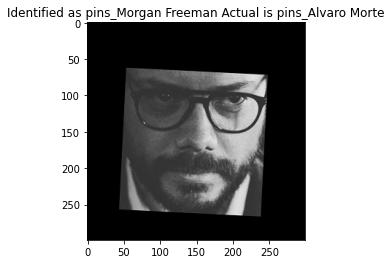

In [64]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svm.predict([X_test_pca[10]])
example_identity = lbec.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity} Actual is {y_test[10]}');

pins_Alvaro Morte


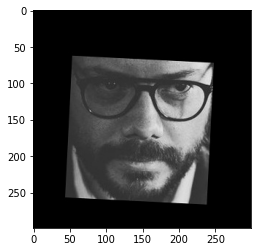

In [65]:
test10 = load_image(metadata[test_idx][10].image_path())
plt.figure()
plt.imshow(test10)
print(y_test[10])